# Curve di possibilità pluviometrica

In [1]:
import os
import math
from pandas import *
import pandas as pd
from datetime import datetime
%matplotlib inline 
import matplotlib.pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF
import numpy as np

from scipy.stats import norm
from scipy.stats import genextreme,gumbel_r
from numpy import linspace
from pylab import plot,show,hist,figure,title

In [2]:
os_DatiFedaia=os.getcwd()
os.chdir(os_DatiFedaia)

In [3]:
data=pd.read_csv('DatiFedaiaSub.csv')

In [4]:
map(datetime,data['Anno'])
data=data.set_index('Anno')

### Definizione dei tempi di ritorno e delle durate prefissate

In [5]:
def indici(cols,dic):
    indi=[]
    
    for x in cols:
        for i,j in dic.items():
            x=x.replace(i,j)
        indi.append(int(x)) 
    return indi

h=[]
for i in range(len(data.columns)):
    h.append(data.columns[i])

car_to_replace={'min':'','ora':'','ore':'','giorno':'','giorni':''}

ind=indici(h,car_to_replace) #ind=[1,3,6,12,24]
r=[10,20,100,500] #Tempi di ritorno in anni

indx=[] #lista con le stringe per indici tempi di ritorno
for i in r:
    indx.append('Tr='+str(i))

In [6]:
best=pd.read_pickle("best_param")
best

,15min,30min,45min,1ora,3ore,6ore,12ore,24ore,1giorno,2giorni,3giorni,4giorni,5giorni
a,7.968888,9.510462,10.926104,12.601354,22.728162,31.960715,48.746973,66.168039,61.988983,87.992147,98.215226,106.758154,111.564329
b,2.852050,2.721378,2.591708,3.002031,5.338338,9.341875,13.646262,24.067697,20.564437,24.175602,25.775174,29.724126,31.780342


#q10=1-1/10 prob di non superamento
#q20=1-1/20
#q100=1-1/100
#q200=1-1/200

### Funzione che ritorna la probabilità di non superamento

In [7]:
def qn(n): #n tempo di ritorno
    return 1-1/n #probabilità di non superamento

### Si definisce una funzione che mi ritorna i quantili

In [8]:
def qtls(df,qu):
    return gumbel_r.ppf(qu,loc=df["a"],scale=df["b"])

### Valori dei quantili 
#### con i parametri migliori per ogni durata ed ogni tempo di ritorno

In [9]:
pts1=[]
pts0=[]
for i in h:
    for j in r:    
        pts0.append(qtls(best[i],qn(j)))
    pts1.append(pts0)
    pts0=[]

pts1
pts= DataFrame(pts1,index=h, columns=r)

In [10]:
pts_min=pts[:3]
pts_ore=pts[3:8]
pts_gg=pts[8:]

### Impostazione dei grafici

In [11]:
XSMALL_SIZE=2
SMALL_SIZE=10
MEDIUM_SIZE=20
BIGGER_SIZE=30
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     #fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rc('lines', linewidth=XSMALL_SIZE)

In [12]:
#tp=np.linspace(0.7,30,100) 
tp_min=np.linspace(0.7,50,100)
tp_ore=np.linspace(0.7,30,100)
tp_gg=np.linspace(0.7,6,100)

#### Colori

In [13]:
import random
colors={}
c=[]
for i in r:
    colore=(random.random(), random.random(), random.random())
    colors.update({i:colore})
    c.append(colors[i])

### Grafico delle altezze di precipitazione

In [14]:
def grafico(df,title,x_label,y_label,leg_label):   
    ax=df.plot(style='-o',figsize=(18,10),color=c)
    ax.grid(True,color='whitesmoke')
    ax.set_title(title,size=MEDIUM_SIZE)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.legend (title= leg_label,loc=7, bbox_to_anchor=(1.3,0.5), fontsize=MEDIUM_SIZE, title_fontsize=MEDIUM_SIZE)

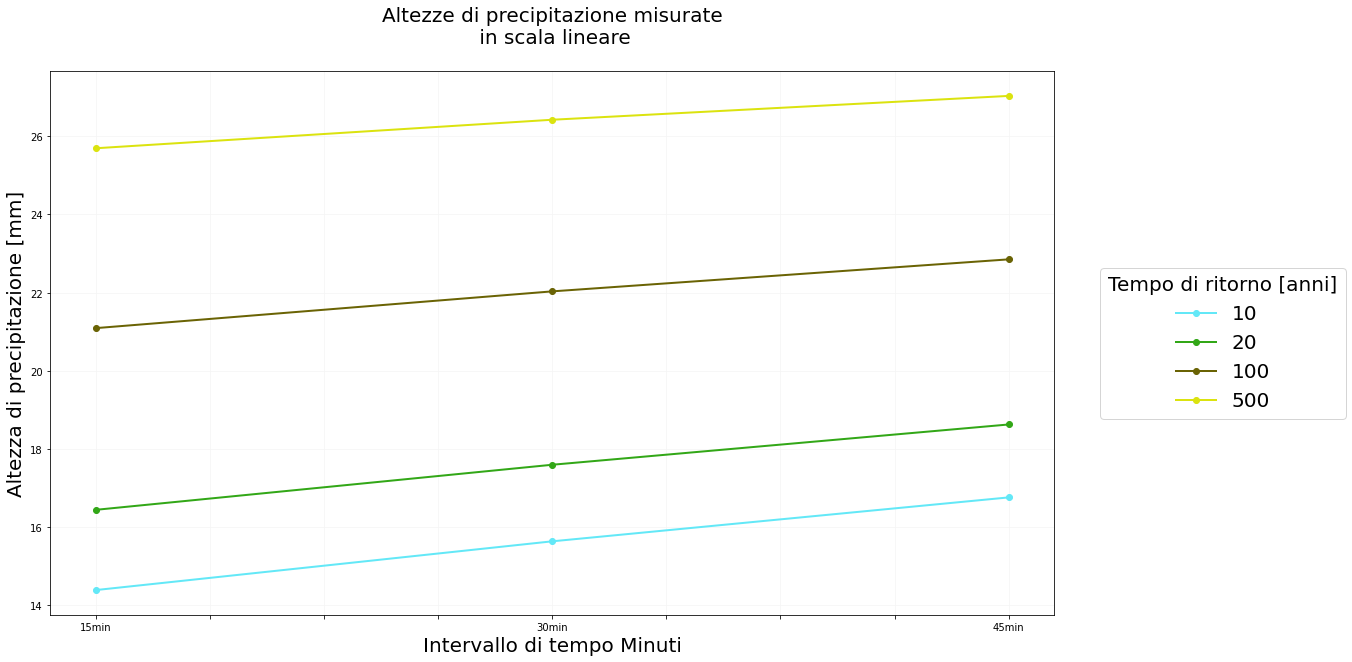

In [15]:
grafico(pts_min,'Altezze di precipitazione misurate\n in scala lineare\n','Intervallo di tempo Minuti','Altezza di precipitazione [mm]',"Tempo di ritorno [anni]")

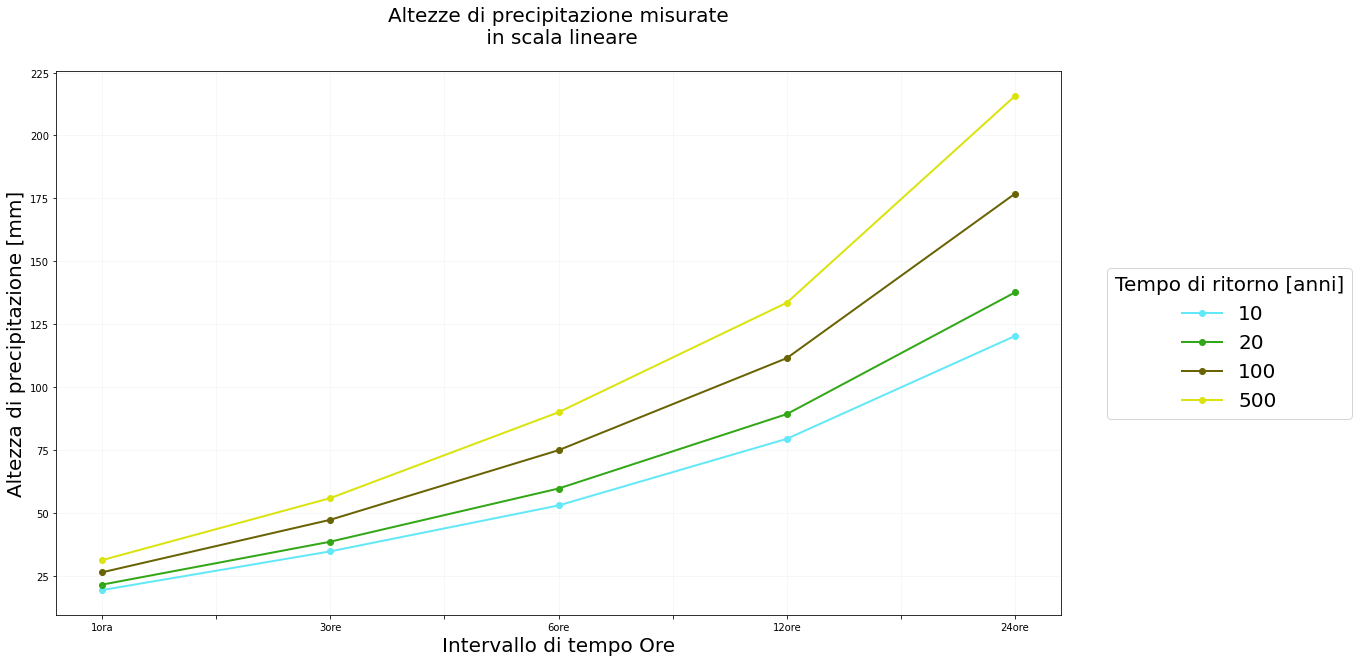

In [16]:
grafico(pts_ore,'Altezze di precipitazione misurate\n in scala lineare\n','Intervallo di tempo Ore','Altezza di precipitazione [mm]',"Tempo di ritorno [anni]")

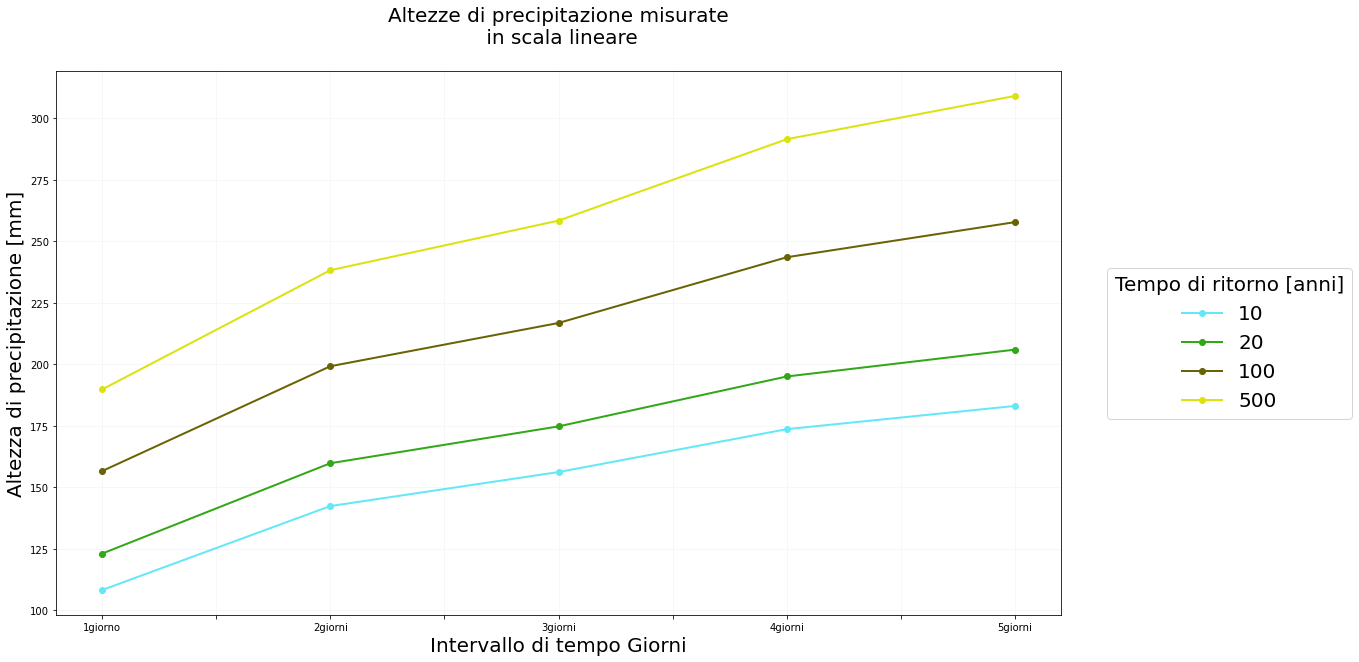

In [17]:
grafico(pts_gg,'Altezze di precipitazione misurate\n in scala lineare\n','Intervallo di tempo Giorni','Altezza di precipitazione [mm]',"Tempo di ritorno [anni]")

## Grafici in scala Logaritmica

In [18]:
def graf_log(df,title,x_label,y_label,leg_label):   
    ax=df.plot(style='-o',figsize=(18,10),color=c)
    ax.set_yscale('log')
    ax.set_xscale('log')    
    ax.grid(True,color='whitesmoke')
    ax.set_title(title,size=MEDIUM_SIZE)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.legend (title= leg_label,loc=7, bbox_to_anchor=(1.3,0.5), fontsize=MEDIUM_SIZE, title_fontsize=MEDIUM_SIZE)

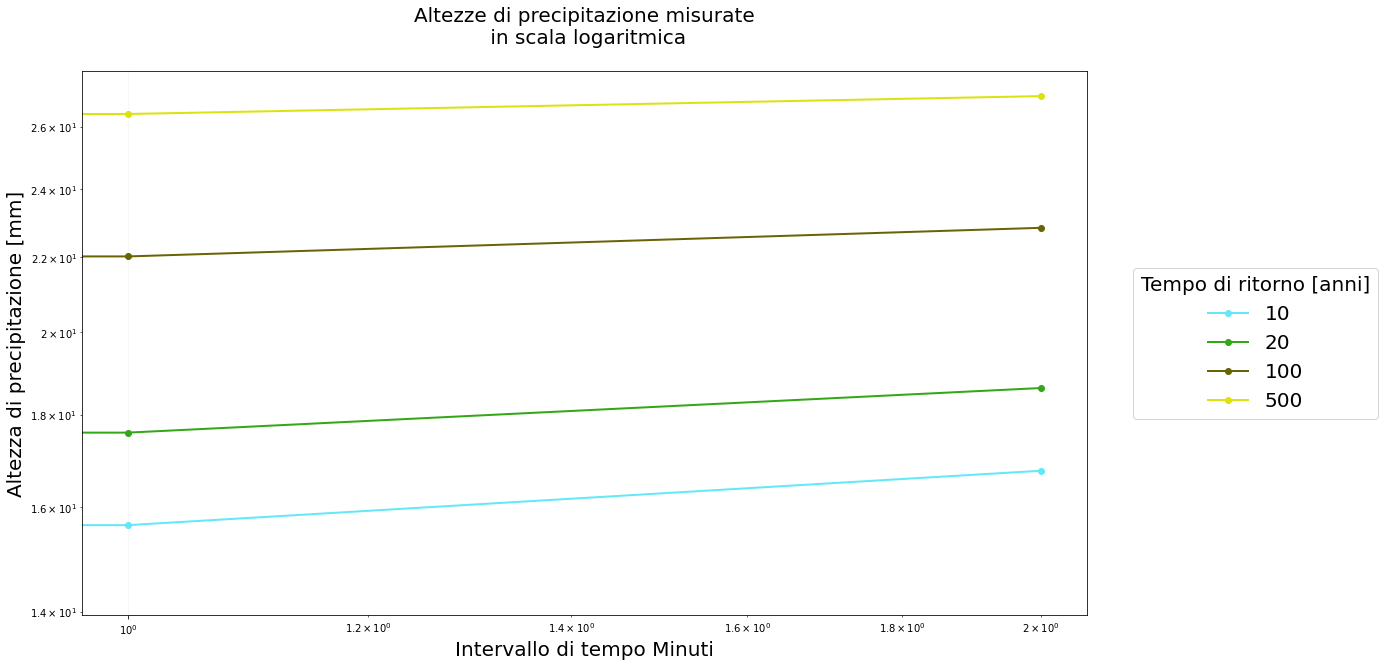

In [19]:
graf_log(pts_min,'Altezze di precipitazione misurate\n in scala logaritmica\n','Intervallo di tempo Minuti','Altezza di precipitazione [mm]',"Tempo di ritorno [anni]")

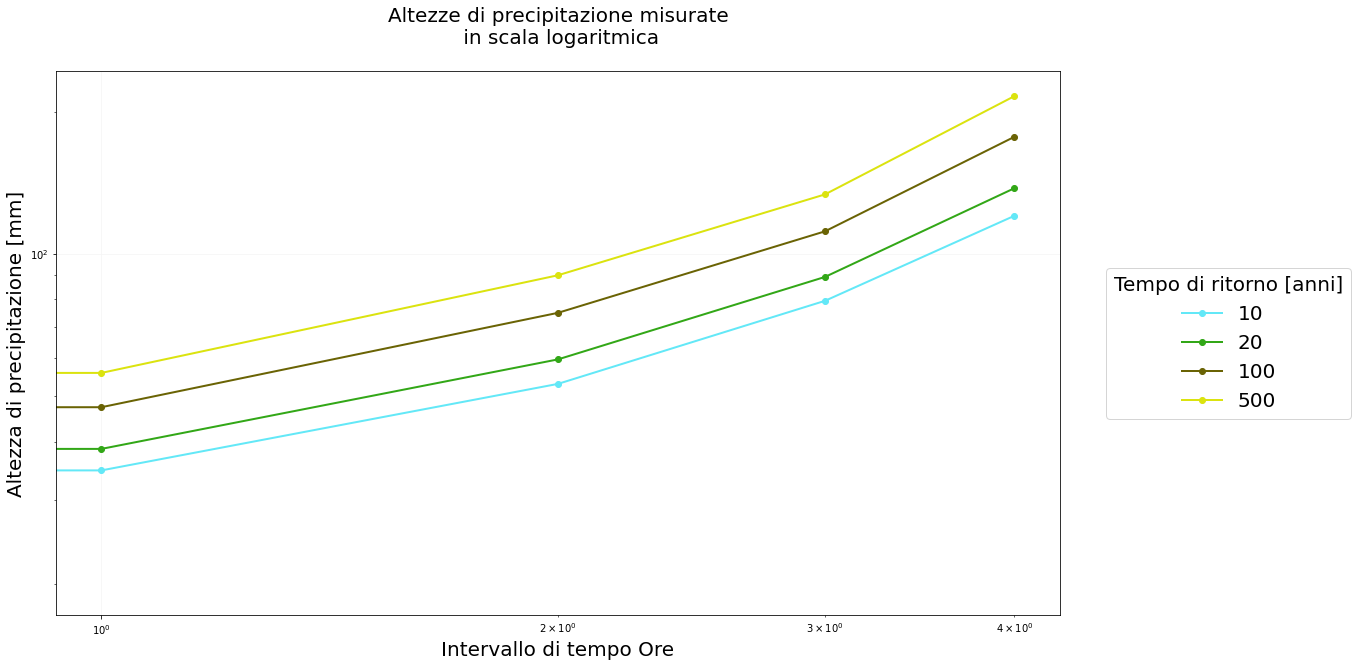

In [20]:
graf_log(pts_ore,'Altezze di precipitazione misurate\n in scala logaritmica\n','Intervallo di tempo Ore','Altezza di precipitazione [mm]',"Tempo di ritorno [anni]")

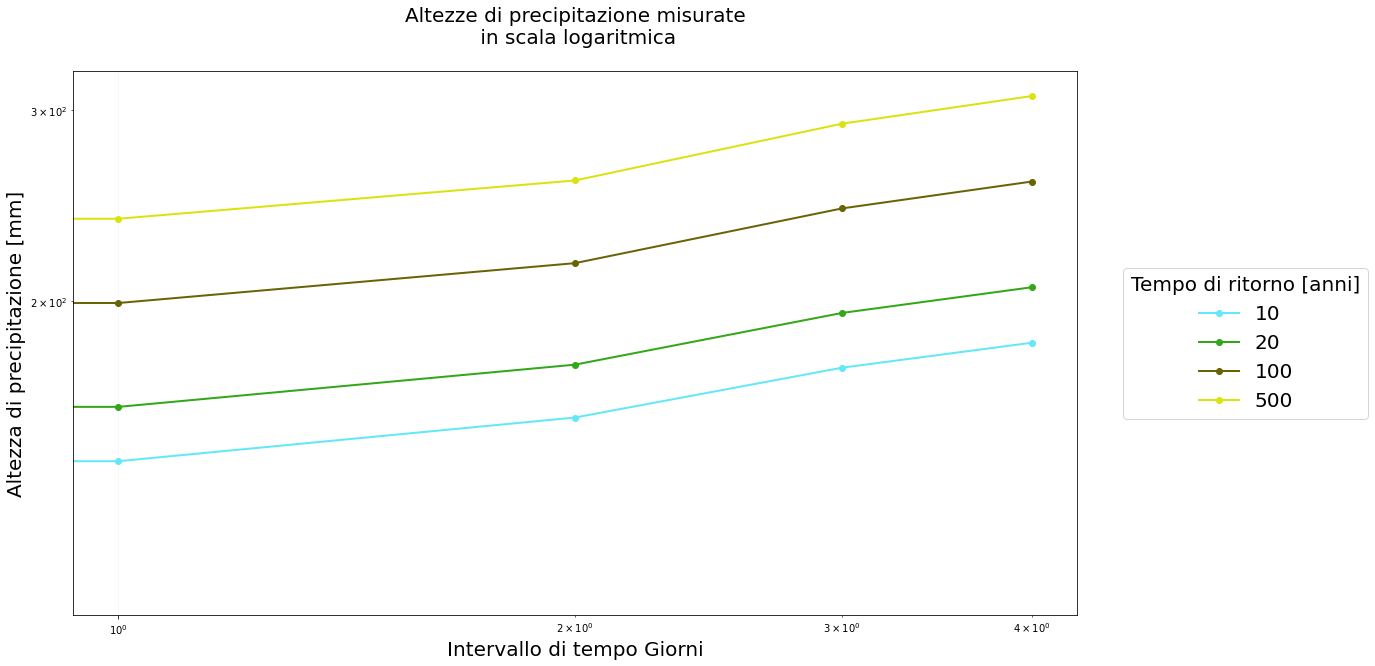

In [21]:
graf_log(pts_gg,'Altezze di precipitazione misurate\n in scala logaritmica\n','Intervallo di tempo Giorni','Altezza di precipitazione [mm]',"Tempo di ritorno [anni]")

### Con un metodo di regressione ottendo i parametri 'a(Tr)' e 'n'

In [22]:
imin=ind[:3] #15,30,45 minuti

iore=ind[3:8] #1,3,6,12,24 ore

igg=ind[8:] #1,2,3,4,5 giorni

#### Funzione che mi ritorna la lista di indici a e n

In [23]:
def IN(lst_Tr,lst_ind,df_pts):
    In=[]
    a=0
    for j in lst_Tr:
        In.append(np.polyfit(np.log(lst_ind),np.log(df_pts[j]),1))
        In[a][1]=np.exp(In[a][1])
        a+=1
    return In

In [24]:
fnl=pd.DataFrame(IN(r,ind,pts),index=r,columns=['n','a'])
fnl_min=pd.DataFrame(IN(r,imin,pts_min),index=r,columns=['n','a']) 
fnl_ore=pd.DataFrame(IN(r,iore,pts_ore),index=r,columns=['n','a']) 
fnl_gg=pd.DataFrame(IN(r,igg,pts_gg),index=r,columns=['n','a']) 

### Funzione delle curve di possibilità pluviometrica

In [25]:
def h(tp,a,n): 
    return a*tp**n

### Dataframe con le altezze di precipitazione in funzione della durata prefissata assegnato il tempo di ritorno

In [26]:
def inh(fnl,tp):   
    hh=[]
    for i in r:
        hh.append(h(tp,fnl['a'][i],fnl['n'][i]))
    inh=pd.DataFrame(hh,index=indx,columns=tp).T
    return inh

In [27]:
inh_min=inh(fnl_min,tp_min)
inh_ore=inh(fnl_ore,tp_ore)
inh_gg=inh(fnl_gg,tp_gg)

### Si graficano i risultati

In [28]:
def graf(df,title,x_label,y_label,leg_label):   
    ax=df.plot(figsize=(18,10),color=c)
    ax.grid(True,color='whitesmoke')
    ax.set_title(title,size=MEDIUM_SIZE)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.legend (title= leg_label,loc=7, bbox_to_anchor=(1.3,0.5), fontsize=MEDIUM_SIZE, title_fontsize=MEDIUM_SIZE)

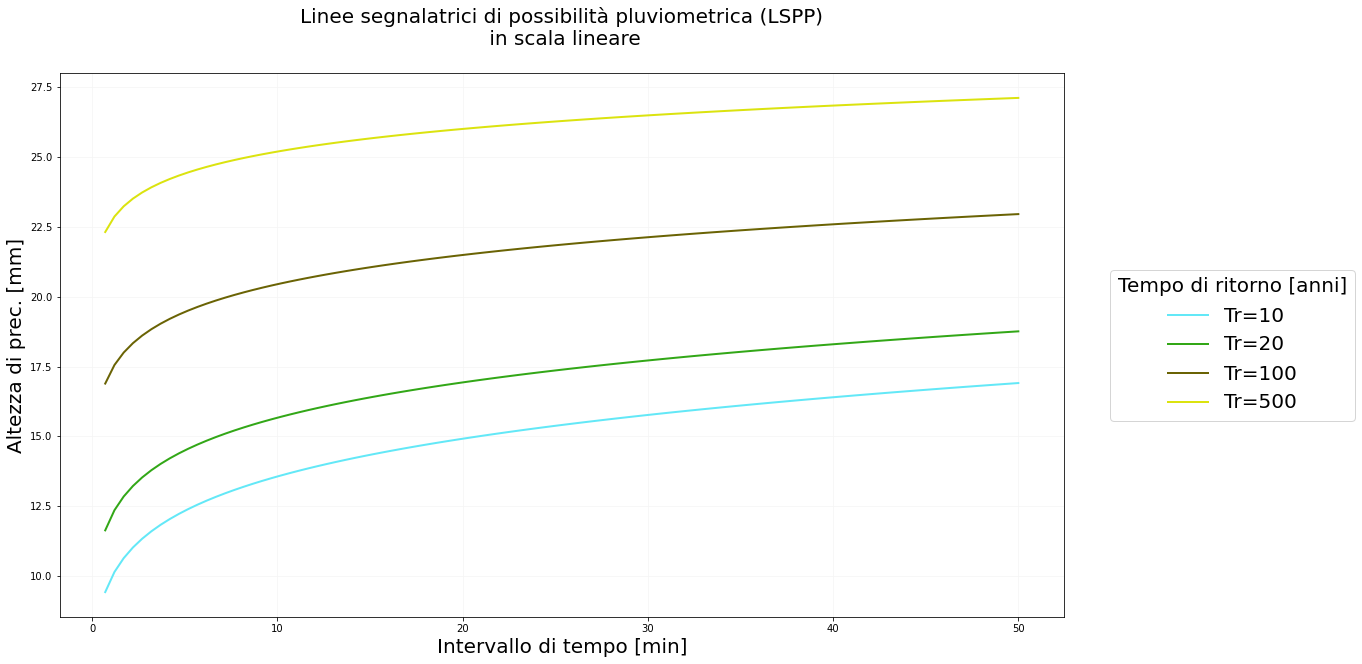

In [29]:
graf(inh_min,'Linee segnalatrici di possibilità pluviometrica (LSPP)\n in scala lineare\n',
             'Intervallo di tempo [min]',
             'Altezza di prec. [mm]',
             "Tempo di ritorno [anni]")

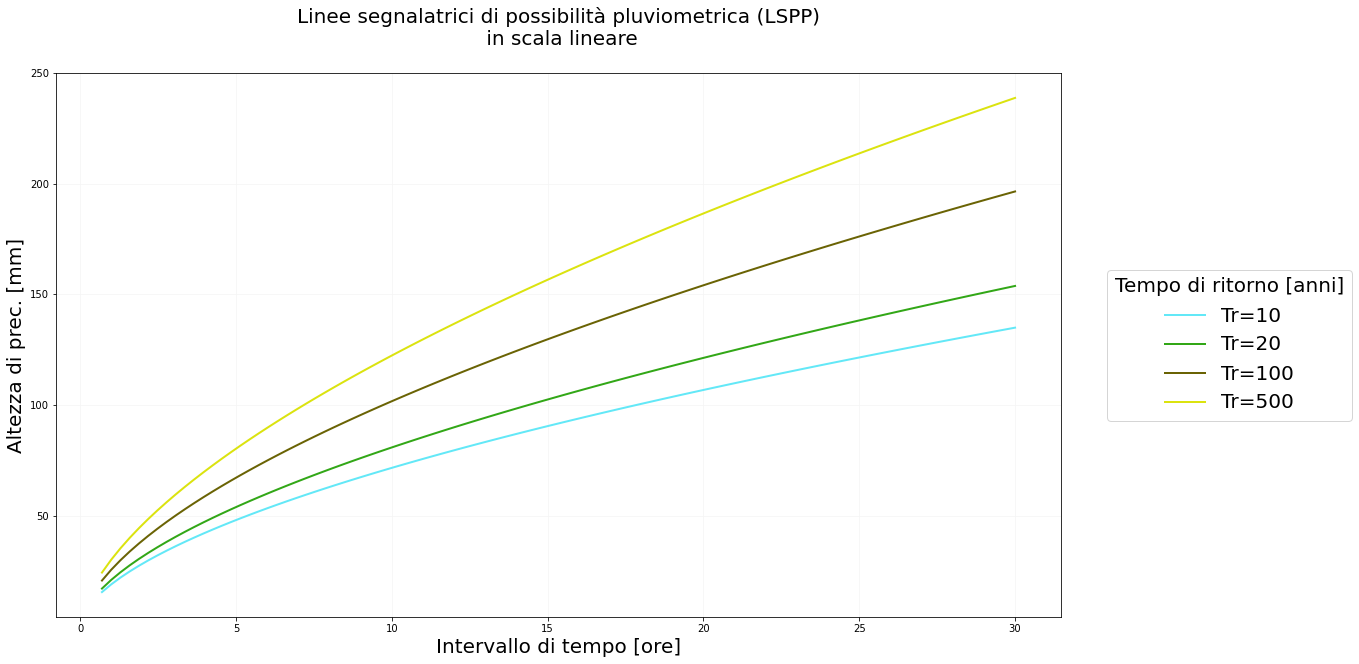

In [30]:
graf(inh_ore,'Linee segnalatrici di possibilità pluviometrica (LSPP)\n in scala lineare\n',
             'Intervallo di tempo [ore]',
             'Altezza di prec. [mm]',
             "Tempo di ritorno [anni]")

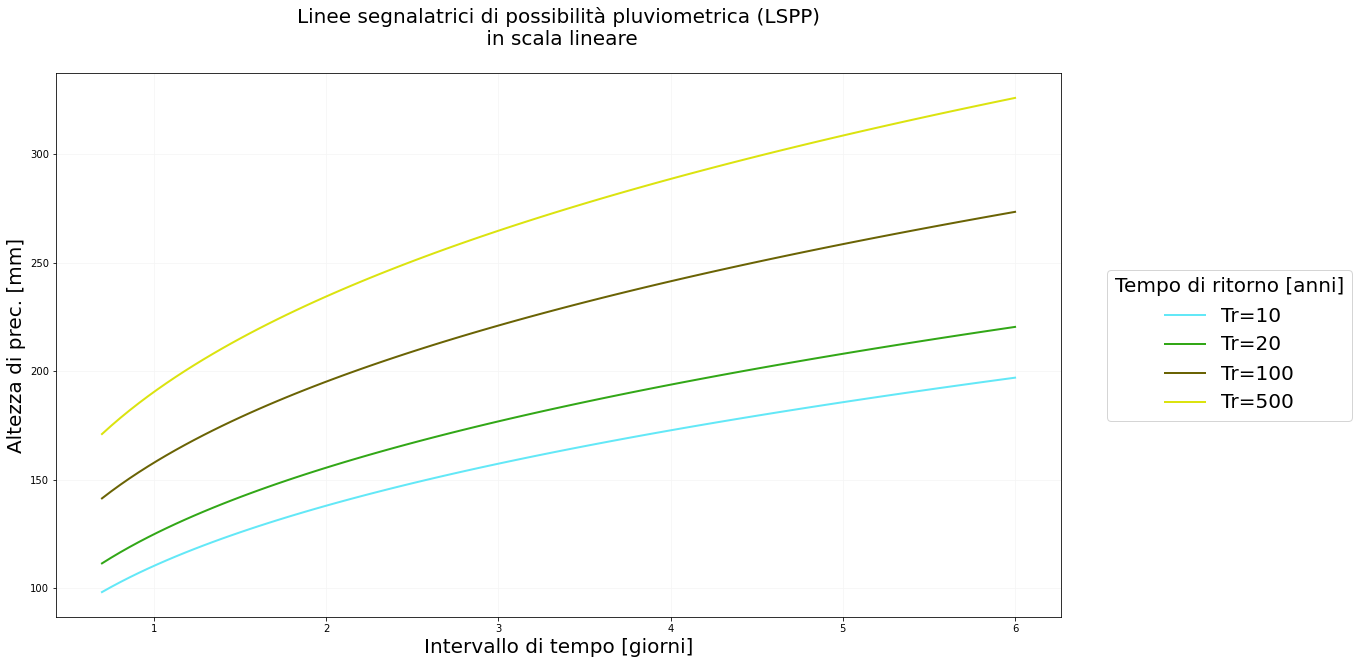

In [31]:
graf(inh_gg,'Linee segnalatrici di possibilità pluviometrica (LSPP)\n in scala lineare\n',
             'Intervallo di tempo [giorni]',
             'Altezza di prec. [mm]',
             "Tempo di ritorno [anni]")

In [32]:
def graf1(df_inh,df_pts,title,x_label,y_label,leg_label):
    ag=df_inh.plot(color=c,figsize=(18,10)) 
    ag.set_title(title,size=MEDIUM_SIZE)
    ag.set_ylabel(y_label)
    ag.set_xlabel(x_label)
    ag.grid(True,color='whitesmoke')
    ag.legend (title= leg_label,loc=7, bbox_to_anchor=(1.3,0.5), fontsize=MEDIUM_SIZE, title_fontsize=MEDIUM_SIZE)

    for i in r:
        ag=plot(df_pts[i],"o",color=colors[i])

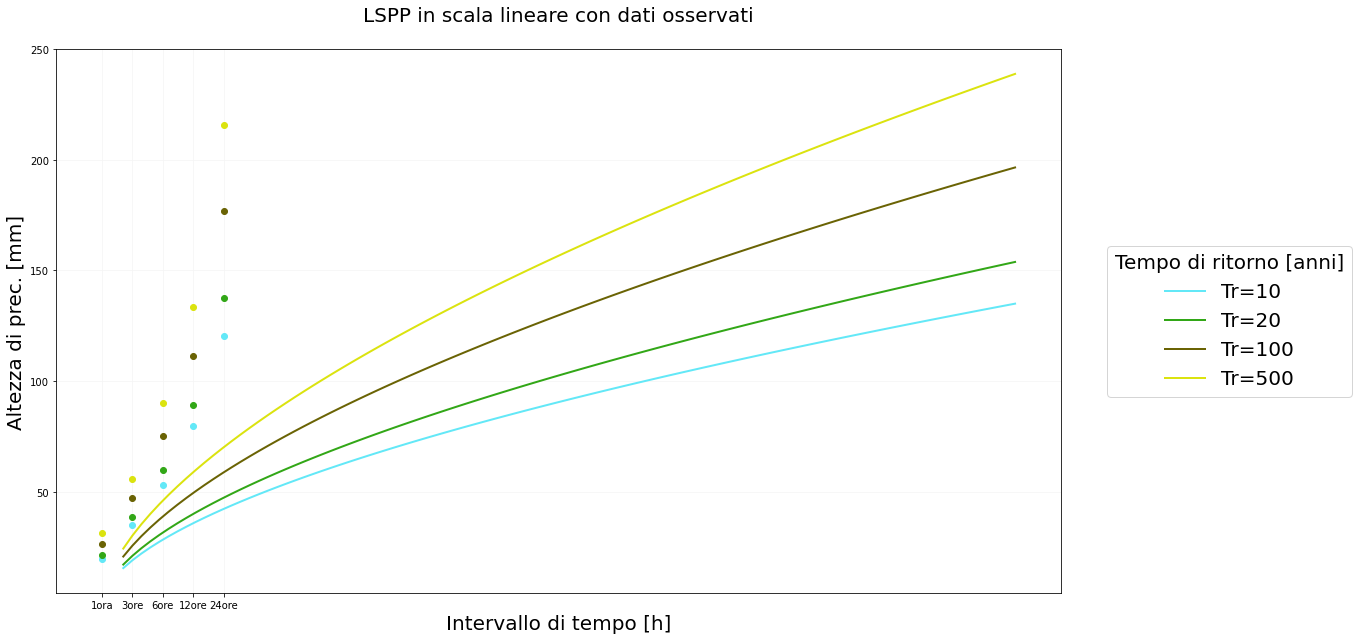

In [33]:
graf1(inh_ore, pts_ore, 'LSPP in scala lineare con dati osservati\n',
      'Intervallo di tempo [h]','Altezza di prec. [mm]',"Tempo di ritorno [anni]")

In [34]:
ag=inh.plot(color=c,figsize=(10,6)) 
ag.set_title('LSPP in scala lineare con dati osservati\n')
ag.set_ylabel('Altezza di prec. [mm]')
ag.set_xlabel('Intervallo di tempo [h]')
ag.grid(True)
ag.legend (title= "Tempo di ritorno [anni]")

for i in r:
    ag=plot(pts[i],"o",color=colors[i])

#plt.xlim([0,30])
#plt.ylim([0,200])

AttributeError: 'function' object has no attribute 'plot'

In [ ]:
ag=inh.plot(color=c,figsize=(10,6))  
ag.set_yscale('log')                                               
ag.set_xscale('log')
ag.set_title('LSPP in scala logaritmica con dati osservati\n')
ag.set_ylabel('Altezza di prec. [mm]')
ag.set_xlabel('Intervallo di tempo [h]')
ag.grid(True)
legend = plt.legend (title= "Tempo di ritorno [anni]")

for i in r:
    ag=plot(pts[i],"o",color=colors[i])

#plt.xlim([0,30])
#plt.ylim([0,200])